### In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

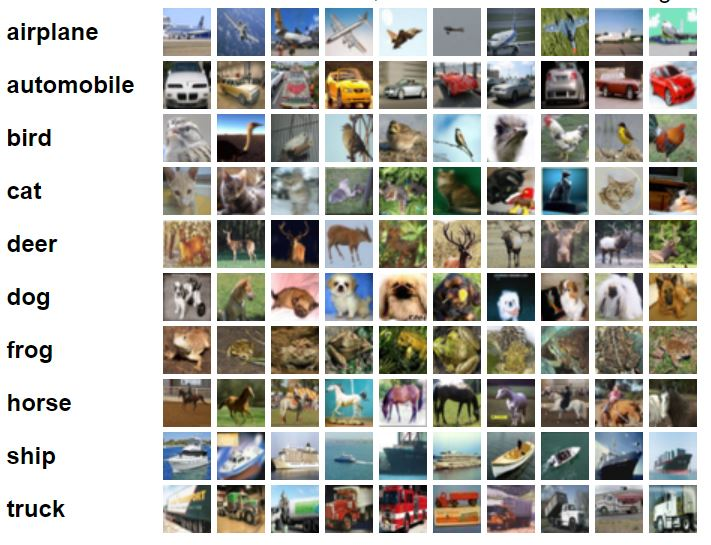

In [18]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

### Load the Dataset from the tensorflow library

In [19]:
#datasets.cifar10.load_data()

In [20]:
(X_train, y_train) , (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

##### 50000=training sample
##### 32x32 image
##### 3-RGB colors

In [21]:
X_test.shape

(10000, 32, 32, 3)

#### Here we see there are 50000 training images and 10000 test images

In [22]:
y_train.shape

(50000, 1)

In [23]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

#### y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [24]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [25]:
y_test = y_test.reshape(-1,)

5000 no needed to change. Therefore I keep it as it is.Becouse of It I used -1.

#### Let's plot some images to see what they are

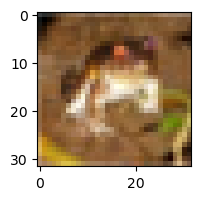

In [26]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [27]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [28]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

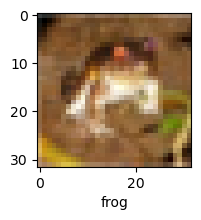

In [29]:
plot_sample(X_train,y_train,0)

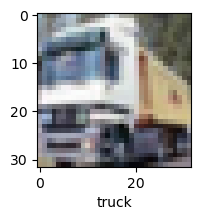

In [30]:
plot_sample(X_train,y_train,1)

#### Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [31]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [32]:
#X_train[0]/255

## Normalize the Training Data

In [33]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [35]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [36]:
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

## Build simple artificial neural network for image classification

In [37]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(3000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### models.Sequential(): This is used to create a linear stack of layers, where each layer has exactly one input tensor and one output tensor.

#### layers.Flatten(input_shape=(32,32,3)): This layer flattens the input. If your input is an image of shape (32, 32, 3) (32x32 pixels with 3 color channels - RGB), this layer converts the 3D array into a 1D array of 32323 = 3072 elements. Flattening the data is essential before passing it to the Dense layers.

#### layers.Dense(3000, activation='relu'):

###### This is a fully connected (dense) layer with 3000 neurons.
###### The activation function used is ReLU (Rectified Linear Unit), which helps introduce non-linearity to the model. ReLU outputs the input directly if it is positive; otherwise, it outputs zero.
#### layers.Dense(3000, activation='relu'):

###### Another Dense layer with 3000 neurons and ReLU activation. Adding multiple Dense layers with ReLU activation allows the network to learn complex patterns in the data.
#### layers.Dense(10, activation='sigmoid'):

###### The final Dense layer has 10 neurons corresponding to the number of output classes (e.g., if you are classifying images into 10 categories).
###### The sigmoid activation function outputs values between 0 and 1. In multi-class classification problems, it's more common to use the softmax activation function instead of sigmoid.

In [39]:
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

#### compile(): This function configures the learning process for the model.

#### optimizer='SGD':

###### The optimizer used is SGD (Stochastic Gradient Descent), which is responsible for updating the weights of the network to minimize the loss function.
####### A loss function is a measure of how good a neural network model is in performing a certain task, which in most cases is regression or classification.

#### loss='sparse_categorical_crossentropy':

###### The loss function used is sparse categorical crossentropy. It's used for multi-class classification problems where the labels are provided as integers (e.g., 0, 1, 2, …, 9). This function computes the cross-entropy loss between true labels and predicted labels.
#### metrics=['accuracy']:

###### This specifies that accuracy will be used as a metric to evaluate the model's performance.

In [40]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3068 - loss: 1.9256
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.4267 - loss: 1.6355
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.4556 - loss: 1.5450
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.4759 - loss: 1.4861
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.4950 - loss: 1.4337


#### fit(): This function trains the model on the training data (X_train and y_train).

#### X_train and y_train: These are the training data and corresponding labels.

#### epochs=5: The model will go through the entire training dataset 5 times. One pass through the entire dataset is called an epoch.

### You can see that at the end of 5 epochs, accuracy is at around 49%

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report : \n", classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.44      0.71      0.55      1000
           1       0.69      0.47      0.56      1000
           2       0.41      0.25      0.31      1000
           3       0.33      0.30      0.31      1000
           4       0.45      0.29      0.35      1000
           5       0.37      0.38      0.37      1000
           6       0.33      0.85      0.47      1000
           7       0.69      0.37      0.48      1000
           8       0.70      0.48      0.57      1000
           9       0.66      0.43      0.52      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.45     10000
weighted avg       0.50      0.45      0.45     10000



#### ann.predict(X_test):
###### This function uses the trained model (ann) to predict the labels for the test data (X_test).
###### y_pred will be a 2D array of predicted probabilities for each class. For example, if there are 10 classes, each row in y_pred will have 10 probability values.

#### np.argmax(element):

###### This function returns the index of the maximum value in an array. In the context of classification, it will return the class label with the highest predicted probability.

#### y_pred_classes:

###### This list comprehension converts the predicted probabilities (y_pred) into class labels by selecting the index (class) with the highest probability for each sample.

#### classification_report(y_test, y_pred_classes):
###### This function generates a classification report that includes metrics such as precision, recall, F1-score, and support for each class.
#### Precision: The ratio of correctly predicted positive observations to the total predicted positives.
#### Recall: The ratio of correctly predicted positive observations to all observations in the actual class.
#### F1-score: The weighted average of precision and recall, providing a balance between them.
#### Support: The number of actual occurrences of each class in the dataset.


### Now let us build a convolutional neural network to train our images

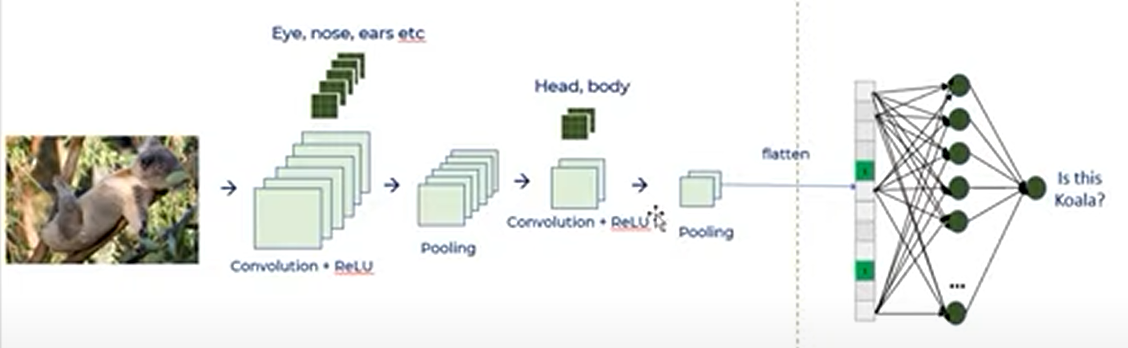

In [43]:
cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### sigmoid
###### 1: 0.45
###### 2: 0.67

#### Soft Max
###### 1: (0.45) / (0.45 + 0.67)
###### =0.40178.......


According to the previously provided image contains Conv + ReLU. Thats why we used ReLU as the activation function. Image Conatains 2 Conv + RelU and Pooling layers. Therefore we build 2 layers inn the code.

In [44]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [45]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.3789 - loss: 1.7066
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6003 - loss: 1.1361
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6493 - loss: 1.0014
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6880 - loss: 0.8987
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7182 - loss: 0.8136
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7347 - loss: 0.7572
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7530 - loss: 0.7054
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7705 - loss: 0.6570
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7864 - loss: 0.6223
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7948 - loss: 0.5860


### With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [46]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7003 - loss: 0.9349


[0.9292744994163513, 0.6980999708175659]